In [108]:
# copyright ############################### #
# This file is part of the Xtrack Package.  #
# Copyright (c) CERN, 2021.                 #
# ######################################### #


import xtrack as xt
import xobjects as xo
import xpart as xp

import ducktrack as dtk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from tqdm import tqdm






beta_rel=0.09405801936973575
gamma = 1.004453024014182

I=0.6
L = 2.5 # m cooler length
r_beam=25*1e-3



T_perp = 0.1 # <E> [eV] = kb*T
T_l =  0.01 # <E> [eV]
B = 0.075 # T for LEIR
B_ratio=1e-10
Z=54

mass0=193729.0248722061*1e6 #eV/c2
c=299792458.0
p0c = mass0*beta_rel*gamma #eV/c

length = 78.54370266 #m
T = length/(c*beta_rel)
ms_per_turn = 1000*T



beta_x=5
beta_y=5
disp_x=-10
#disp_x=0
Q_x=5.38518956965
Q_y=5.36921653748

emittance=14*1e-6



arc=dtk.LinearTransferMatrix(Q_x=Q_x-1, Q_y=Q_y-1,
                            beta_x_0=beta_x, beta_x_1=beta_x,
                            beta_y_0=beta_y,  beta_y_1=beta_y,
                            alpha_x_0=0,   alpha_x_1=0,
                            alpha_y_0=0,   alpha_y_1=0,
                            disp_x_0=0,disp_x_1=disp_x,
                            disp_y_0=0,    disp_y_1=0,
                            beta_s=1*1e40,
                            Q_s=0,
                            chroma_x=0.0, chroma_y=0
                                           
                 )


arc2=dtk.LinearTransferMatrix(Q_x=5.1, Q_y=5.1,
                            beta_x_0=beta_x, beta_x_1=beta_x,
                            beta_y_0=beta_y,  beta_y_1=beta_y,
                            alpha_x_0=0,   alpha_x_1=0,
                            alpha_y_0=0,   alpha_y_1=0,
                            disp_x_0=disp_x,disp_x_1=0,
                            disp_y_0=0,    disp_y_1=0,
                            beta_s=1*1e40,
                            Q_s=0,
                            chroma_x=0.0, chroma_y=0
                                           
                 )



num_particles=int(1)
num_turns=int(1e6)
step=1
#x=np.random.normal(0,np.sqrt(5*emittance) ,num_particles),
#px=np.random.normal(0, np.sqrt(emittance/5), num_particles),
#x=np.linspace(1*1e-3, 20*1e-3, num_particles),
#px=np.random.uniform(0, 0, num_particles),

x_initial=np.linspace(-20e-3,20*1e-3,num_particles)
delta_initial=np.linspace(-20e-3,20*1e-3,num_particles)

delta_initial=10*1e-3

#x_initial=np.array([-15e-3,-2e-3,15e-3])


dtk_particle = dtk.TestParticles(
        
        mass0=mass0,
        p0c=p0c,
        x=delta_initial*disp_x,
        px=0,
        y=0,
        py=0,
        delta=delta_initial,
        zeta=0)

dtk_particle_copy_old=dtk_particle.copy()


dtk_cooler = dtk.elements.ElectronCooler(I=I,L=L,r_beam=r_beam,
                                         T_perp=T_perp,T_l=T_l,
                                         B=B,Z=Z,B_ratio=B_ratio,
                                         Neutralisation_space_charge=1)

       




x=[]
px=[]
action = []
force = []
delta = []



for i in tqdm(range(num_turns)):
    if i % step == 0:

        x.append(dtk_particle.x)
        px.append(dtk_particle.px)
        delta.append(dtk_particle.delta)
    
        action_temp = 0.5*(dtk_particle.x**2/beta_x + beta_x*dtk_particle.px**2) #Joule sec
        action.append(action_temp)
    
        
    
    arc.track(dtk_particle)
        
    dtk_cooler.track(dtk_particle)
    arc2.track(dtk_particle)  


x = np.array(x)
px = np.array(px)
action = np.array(action)
force = np.array(force)
delta = np.array(delta)

amplitude_x=np.sqrt(2*action[::1]*beta_x)
time = np.arange(0, num_turns, step) * ms_per_turn


100%|██████████| 1000000/1000000 [01:46<00:00, 9365.04it/s]


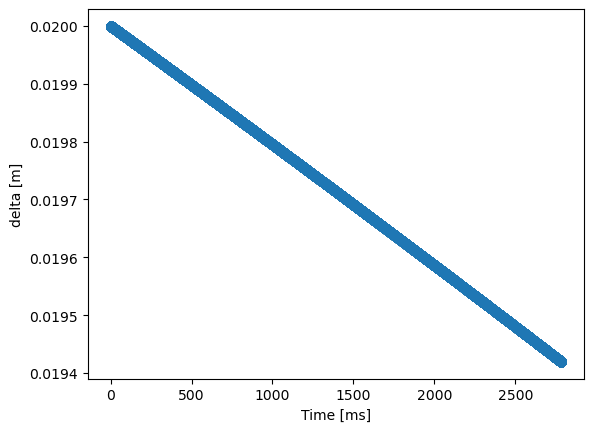

In [107]:
plt.figure()
for i in range(num_particles):
    
    plt.scatter(time,delta)

plt.ylabel('delta [m]')
plt.xlabel(('Time [ms]'))
plt.ticklabel_format(useOffset=False)
plt.show()

In [103]:
cutoff=0.025
mask_list=[]
plt.figure()
for i in range(num_particles):
    mask = np.argmax(amplitude_x[:,i] > cutoff)
       
    if mask==0:
        mask=-1
        mask_list.append(True)
    else: mask_list.append(False)    
    plt.scatter(time[:mask],amplitude_x[:,i][:mask])

plt.ylabel('x [m]')
plt.xlabel(('Time [ms]'))
plt.ticklabel_format(useOffset=False)
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a random boolean array

# Plot the boolean array as a scatter plot
plt.figure()
plt.scatter(x_initial,mask_list)

plt.title(f'Particles that remain in beam vs initial position({time[-1]/1e3:.1f} s)')
plt.xlabel('x initial [m]')
plt.ylabel('Boolean Value')
plt.text(0.01, 0.9,f'Losses:{100-100*np.mean(mask_list)}%', fontsize=12)
plt.show()

In [ ]:
1-np.mean(mask_list)